<a href="https://colab.research.google.com/github/massirism/Codes/blob/main/nlp_constructing_text_generation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Constructing a Text Generation Model


<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l10c03_nlp_constructing_text_generation_model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l10c03_nlp_constructing_text_generation_model.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Using most of the techniques you've already learned, it's now possible to generate new text by predicting the next word that follows a given seed word. To practice this method, we'll use the [Kaggle Song Lyrics Dataset](https://www.kaggle.com/mousehead/songlyrics).

## Import TensorFlow and related functions

In [4]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Other imports for processing data
import string
import numpy as np
import pandas as pd

## Get the Dataset

As noted above, we'll utilize the [Song Lyrics dataset](https://www.kaggle.com/mousehead/songlyrics) on Kaggle.

In [1]:
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8 \
    -O /tmp/songdata.csv

--2021-01-18 00:40:10--  https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8
Resolving drive.google.com (drive.google.com)... 74.125.142.113, 74.125.142.139, 74.125.142.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/letse6n6sqp080srrp9nvgnhfkf0mgg4/1610930400000/11118900490791463723/*/1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8 [following]
--2021-01-18 00:40:14--  https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/letse6n6sqp080srrp9nvgnhfkf0mgg4/1610930400000/11118900490791463723/*/1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8
Resolving doc-04-ak-docs.googleusercontent.com (doc-04-ak-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-04-ak-docs.googleusercontent.com (doc-04-ak-docs.googleusercontent.com)|74.125.

## **First 10 Songs**

Let's first look at just 10 songs from the dataset, and see how things perform.

### Preprocessing

Let's perform some basic preprocessing to get rid of punctuation and make everything lowercase. We'll then split the lyrics up by line and tokenize the lyrics.

Vamos a realizar un preprocesamiento básico para eliminar la puntuación y hacer todo en minúsculas. Luego dividiremos las letras por líneas y haremos una ficha con las letras.

In [2]:

def tokenize_corpus(corpus, num_words=-1):
  # Fit a Tokenizer on the corpus
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer
  
#Se realiza un preprocesamiento básico para eliminar la puntuación y hacer todo en minúsculas. 
#Dividiremos las letras por líneas y haremos una ficha con las letras.
def create_lyrics_corpus(dataset, field):
  # Remove all other punctuation
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
  # Make it lowercase
  dataset[field] = dataset[field].str.lower()
  # Make it one long string to split by line
  lyrics = dataset[field].str.cat()
  corpus = lyrics.split('\n')
  # Remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  # Remove any empty lines
  corpus = [l for l in corpus if l != '']

  return corpus

In [5]:
# Read the dataset from csv - just first 10 songs for now
dataset = pd.read_csv('/tmp/songdata.csv', dtype=str)[:50]
# Create the corpus using the 'text' column containing lyrics
corpus = create_lyrics_corpus(dataset, 'text')
# Tokenize the corpus
tokenizer = tokenize_corpus(corpus)

total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'i': 1, 'the': 2, 'you': 3, 'a': 4, 'and': 5, 'me': 6, 'to': 7, 'it': 8, 'of': 9, 'in': 10, 'my': 11, 'im': 12, 'that': 13, 'is': 14, 'your': 15, 'be': 16, 'so': 17, 'for': 18, 'we': 19, 'love': 20, 'on': 21, 'its': 22, 'youre': 23, 'all': 24, 'when': 25, 'do': 26, 'if': 27, 'can': 28, 'like': 29, 'know': 30, 'but': 31, 'make': 32, 'no': 33, 'were': 34, 'have': 35, 'gonna': 36, 'just': 37, 'see': 38, 'could': 39, 'this': 40, 'never': 41, 'take': 42, 'let': 43, 'now': 44, 'as': 45, 'will': 46, 'one': 47, 'through': 48, 'time': 49, 'with': 50, 'think': 51, 'hey': 52, 'girl': 53, 'am': 54, 'oh': 55, 'what': 56, 'was': 57, 'every': 58, 'honey': 59, 'way': 60, 'sing': 61, 'here': 62, 'dont': 63, 'are': 64, 'how': 65, 'feel': 66, 'our': 67, 'fernando': 68, 'ma': 69, 'new': 70, 'day': 71, 'nights': 72, 'theres': 73, 'well': 74, 'out': 75, 'there': 76, 'gimme': 77, 'at': 78, 'go': 79, 'song': 80, 'had': 81, 'then': 82, 'from': 83, 'only': 84, 'good': 85, 'not': 86, 'wasnt': 87, 'she': 88, 'ye

### Create Sequences and Labels

After preprocessing, we next need to create sequences and labels. Creating the sequences themselves is similar to before with `texts_to_sequences`, but also including the use of [N-Grams](https://towardsdatascience.com/introduction-to-language-models-n-gram-e323081503d9); creating the labels will now utilize those sequences as well as utilize one-hot encoding over all potential output words.


Después del preprocesamiento, necesitamos crear secuencias y etiquetas. La creación de las secuencias en sí es similar a la anterior con textos_a_secuencias, pero también incluye el uso de N-Gramas; la creación de las etiquetas utilizará ahora esas secuencias, así como la codificación de un solo paso sobre todas las posibles palabras de salida.

In [6]:
sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		sequences.append(n_gram_sequence)

# Pad sequences for equal input length 
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))

# Split sequences between the "input" sequence and "output" predicted word
input_sequences, labels = sequences[:,:-1], sequences[:,-1]
# One-hot encode the labels
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [7]:
# Check out how some of our data is being stored
# The Tokenizer has just a single index per word
print(tokenizer.word_index['know'])
print(tokenizer.word_index['feeling'])
# Input sequences will have multiple indexes
print(input_sequences[5])
print(input_sequences[6])
# And the one hot labels will be as long as the full spread of tokenized words
print(one_hot_labels[5])
print(one_hot_labels[6])

30
107
[  0   0   0   0   0   0   0   0   0   0   0   0   0 126  78 211 156  22
   4]
[  0   0   0   0   0   0   0   0   0   0   0   0 126  78 211 156  22   4
 895]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


### Train a Text Generation Model

Building an RNN to train our text generation model will be very similar to the sentiment models you've built previously. The only real change necessary is to make sure to use Categorical instead of Binary Cross Entropy as the loss function - we could use Binary before since the sentiment was only 0 or 1, but now there are hundreds of categories.

From there, we should also consider using *more* epochs than before, as text generation can take a little longer to converge than sentiment analysis, *and* we aren't working with all that much data yet. I'll set it at 200 epochs here since we're only use part of the dataset, and training will tail off quite a bit over that many epochs.


La construcción de un RNN para entrenar nuestro modelo de generación de texto será muy similar a los modelos de sentimiento que has construido anteriormente. El único cambio real necesario es asegurarse de usar Categorial en lugar de la Entropía Cruzada Binaria como la función de pérdida - antes podíamos usar Binario ya que el sentimiento era sólo 0 o 1, pero ahora hay cientos de categorías.

A partir de ahí, también deberíamos considerar el uso de más épocas que antes, ya que la generación de texto puede tardar un poco más en converger que el análisis del sentimiento, y todavía no estamos trabajando con tantos datos. Lo fijaré en 200 épocas aquí, ya que sólo usamos parte del conjunto de datos, y el entrenamiento se reducirá bastante en esas épocas.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

#Creación del modelo, bidireccional para hacer la memoria LSTM!
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input_sequences, one_hot_labels, epochs=500, verbose=1)

Epoch 1/500
327/327 [==============================] - 11s 8ms/step - loss: 6.5575 - accuracy: 0.0369
Epoch 2/500
327/327 [==============================] - 3s 8ms/step - loss: 5.7492 - accuracy: 0.0416
Epoch 3/500
327/327 [==============================] - 3s 8ms/step - loss: 5.6630 - accuracy: 0.0401
Epoch 4/500
327/327 [==============================] - 3s 8ms/step - loss: 5.5634 - accuracy: 0.0449
Epoch 5/500
327/327 [==============================] - 3s 8ms/step - loss: 5.4683 - accuracy: 0.0487
Epoch 6/500
327/327 [==============================] - 3s 8ms/step - loss: 5.3277 - accuracy: 0.0593
Epoch 7/500
327/327 [==============================] - 3s 8ms/step - loss: 5.2046 - accuracy: 0.0658
Epoch 8/500
327/327 [==============================] - 3s 8ms/step - loss: 5.0953 - accuracy: 0.0738
Epoch 9/500
327/327 [==============================] - 3s 8ms/step - loss: 4.9626 - accuracy: 0.0736
Epoch 10/500
327/327 [==============================] - 3s 8ms/step - loss: 4.8942 - accur

### View the Training Graph

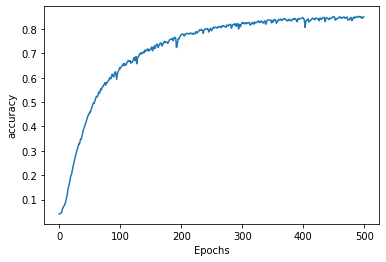

In [9]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

### Generate new lyrics!

It's finally time to generate some new lyrics from the trained model, and see what we get. To do so, we'll provide some "seed text", or an input sequence for the model to start with. We'll also decide just how long of an output sequence we want - this could essentially be infinite, as the input plus the previous output will be continuously fed in for a new output word (at least up to our max sequence length).


Por fin es hora de generar algunas letras nuevas del modelo entrenado, y ver qué obtenemos. Para ello, proporcionaremos algún "texto de la semilla", o una secuencia de entrada para que el modelo empiece. También decidiremos cuánto tiempo de una secuencia de salida queremos - esto podría ser esencialmente infinito, ya que la entrada más la salida anterior será continuamente alimentada por una nueva palabra de salida (al menos hasta nuestra máxima longitud de secuencia)

In [11]:
seed_text = "She is a bad idea"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

She is a bad idea you hear you hold me what it in me that guy able about while smile and higher shopping flat mean is happened queen happened up along into me but same girl just turn while cry intention know sweet ground seem dream lies place old new where oh ship lies oh who fire eyes ground delight everythings stick just prepared think from lies crazy rustling down but fire style returning glad from returning they arms business strange sad shopping out seen habia live for believed prays chat prays memories boomerang forever flat shallow power truth volverlo help others tend so fine
